<b>Haberman Survival Dataset </b> is a case study conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital to study if a patient survives after undergoing a surgery for breast cancer based on certain parameters.

<b>Data Attributes </b>
The dataset has 4 attributes with the following data. These features have been recorded overtime to study their 
effects on survival rates of patients.

1. Age of patient at time of operation (numerical) 
2. Patient’s year of operation (year — 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
 — 1 = the patient survived 5 years or longer 
 — 2 = the patient died within 5 year

<b>Problem objective </b>
Here the objective is to predict whether a patient will survive for at least 5 years or not based upon the patient’s age, 
year of treatment and the number of positive lymph nodes in his body.

In [ ]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importing the dataset
data=pd.read_csv("haberman.csv")

# Basic Inferencial Statistics 

In [3]:
#Data preview 
data.head(3)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [4]:
#Quering the shape- The number of rows and column
#The dataset has 306 rows and 4 columns
data.shape

(306, 4)

In [5]:
#Examining dataframes- the datatypes of columns
data.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [6]:
#Examining the datatype of each feature- No null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [7]:
#To display the names of the columns
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [8]:
#Describes the summary statistics
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The mean of age,year,nodes and status are 52.5,62.8,4.03 and 1.26 respectively. The status column must be categorical variable. The value of its mean is incorrect and hence, it is convereted to a categorical value in the next step.

In [9]:
#Check unique values
data.status.unique()

array([1, 2], dtype=int64)

In [10]:
#Converting 1 and 2 for convinience of reading. Status is a categorical variable with values 1 and 2.
#Computing the sum as a continuous variable is incorrect and hence it is converted to a categorical values with 'Yes' and 'No'
data['status']=data.status.map({1:"Yes",2:"No"})

In [11]:
#To show summary statistics
data.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


From the above table it can be seen that the average age is around 52.5, average year is 62.8 and average number of nodes is 4.02

In [12]:
#Summary statistics of the categorical variable staatus
data['status'].describe()

count     306
unique      2
top       Yes
freq      225
Name: status, dtype: object

In [16]:
data['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

In [21]:
percentge=81/(225+81)
print(percentge)

0.2647058823529412


There are 225 yes and 81 nos. The distribution is highly imbalanced as only 26.4% columns are no. This implies that 26.4% died within 5 years of the treatment

# Box Plot

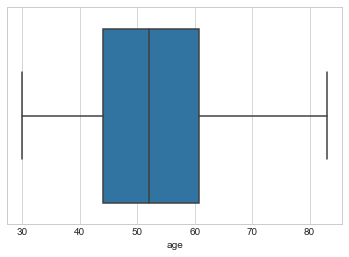

In [32]:
#Detecting if there are any outliers through boxplots
sns.boxplot(data.age)

The age column has no outliers. The median age is around 52. Most of the ages are in between 44 and 61.

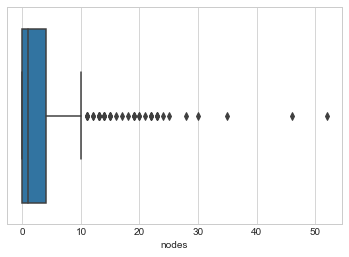

In [33]:
sns.boxplot(data.nodes)

The nodes column has many outliers. Any values greater than 10 can be considered erroneous or inconsitent. The range of number of nodes is from 0 to 5 with the median being around 1.

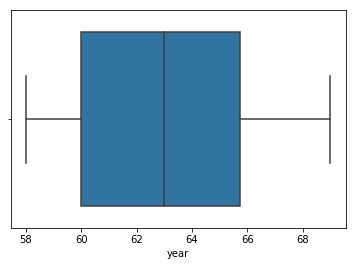

In [22]:
sns.boxplot(data.year)

It can be seen from the above figure that year column has no outliers. The range of years is between 60 and 66 with the median of 63.The minimum value is 58 and the maxium value is around 67

# Summary statistics for the above three columns (age, year and nodes) to get the exact numbers

In [30]:
#getting exact number of medians of all the three data coulmns
print("Median of age",np.median(data['age']))
print("Median of year",np.median(data['year']))
print("Median of nodes",np.median(data['nodes']))

Median of age 52.0
Median of year 63.0
Median of nodes 1.0


From the above cell it can be observed that most of the values are centered around 52 for age, 63 for year and 1 for nodes.

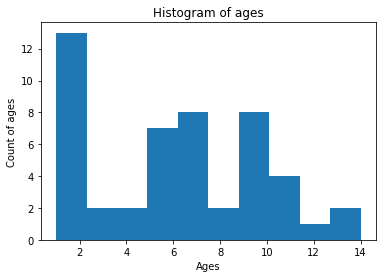

In [23]:
plt.hist(data['age'].value_counts())
plt.title("Histogram of ages")
plt.xlabel("Ages")
plt.ylabel("Count of ages")
plt.show()

Here from the histogram it can be inferred that age between 1 amd 2 have the highest number of frequencies. 
The histogram is skewed to the right.


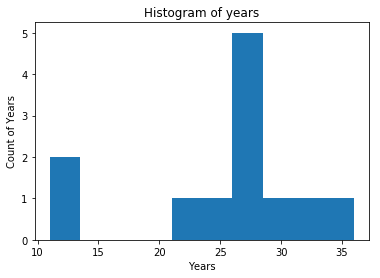

In [24]:

plt.hist(data['year'].value_counts())
plt.title("Histogram of years")
plt.xlabel("Years")
plt.ylabel("Count of Years")
plt.show()

There is an unusual pattern in the above histogram with spikes in between. The distribution of year can be considered
as left skewed.

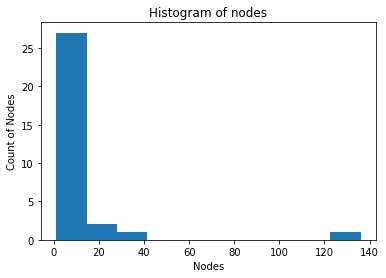

In [25]:

plt.hist(data['nodes'].value_counts())
plt.title("Histogram of nodes")
plt.xlabel("Nodes")
plt.ylabel("Count of Nodes")
plt.show()

In the above histogram it can be seen that the values of nodes are skewed to the right

# Violin Plot

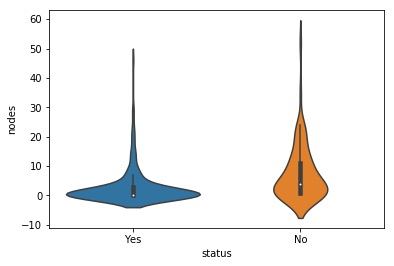

In [43]:
#Violin plot of status against nodes
sns.violinplot(x="status",y="nodes",data=data,size=10)
plt.show()

In the above violin plot it can be seen that the probability distribution function of nodes is extremely skwed to the right 
for both the values of status 

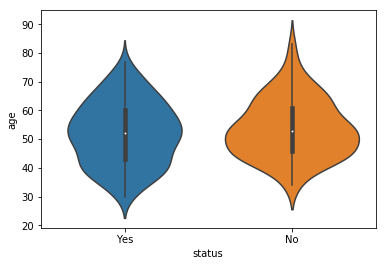

In [44]:
#violin plot of status against age
sns.violinplot(x="status",y="age",data=data,size=10)
plt.show()

In the above violin plot it can be seen that the probability distribution function of age nearly resembles a gaussian function 
for status yes and is slightly skewed to the right for status value No

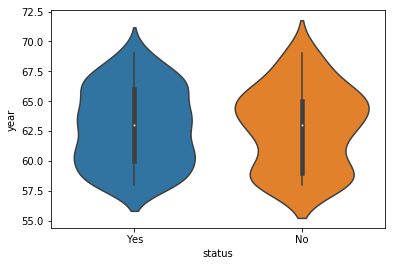

In [47]:
#Violin plot of status against year
sns.violinplot(x="status",y="year",data=data,size=10)
plt.show()

In the above violin plot it can be seen that for both the values of status, the probability plot of year is multi modal.

# Box-plot 

[]

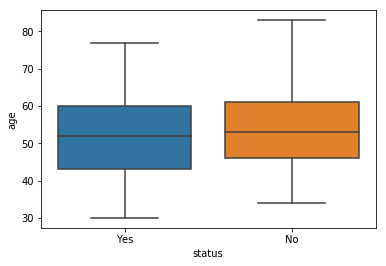

In [48]:
#Box plot of status against age
sns.boxplot(x="status",y="age",data=data)
plt.plot()

The median age of a person surviving is around 51 while the median age of a patient not surviving is around 52

[]

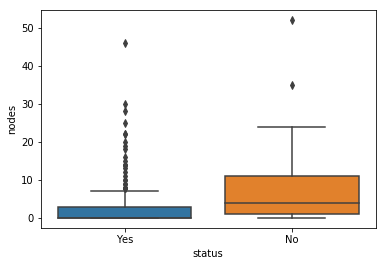

In [55]:
#Box plot of status against nodes
sns.boxplot(x="status",y="nodes",data=data)
plt.plot()

A patient with median around 5 nodes doesn't survive the treatment. The range of non survival is between 4 and 25 who have not survived. Among the patients who suvived, the maximum number of nodes he has was around 8. 

[]

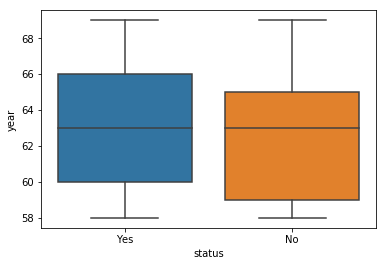

In [51]:
#Box plot of status against age
sns.boxplot(x="status",y="year",data=data)
plt.plot()

In the above boxplot it can be seen that the median age of srvival and non survival is the same with 63. This year is crucial. 
Most of the patients who didn't survive had their surgery done between 59 and 65th year. The minimum and maximum year has been 58 and 68 for both the cases. There may be the possibility of an epidemic kind of a situation in this year range.

# Bivariate Analysis

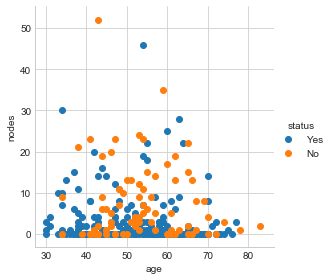

In [29]:
# A basic scatterplot between age and nodes using status as a variable to color
sns.set_style("whitegrid")
sns.FacetGrid(data,hue='status',size=4).map(plt.scatter,"age","nodes").add_legend()
plt.show()

# Scatterplots to better understand data

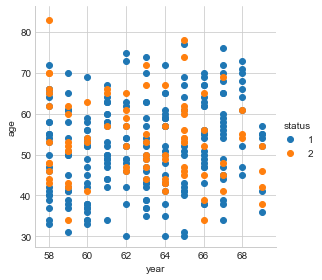

In [9]:
#Create a scatterplot based on status taking year on x-axis and age on y-axis
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="status",size=4).map(plt.scatter,"year","age").add_legend();
plt.show()
#We can still make no valid inferences from here  as the points are still not differenciable

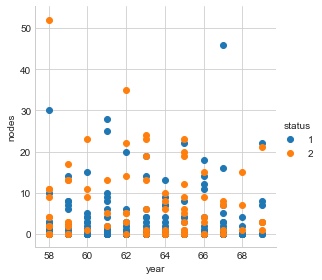

In [10]:
#Create a scatterplot based on status taking year on x-axis and nodes on y-axis
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="status",size=4).map(plt.scatter,"year","nodes").add_legend();
plt.show()
#We can still make no valid inferences from here  as the points are still not differenciable

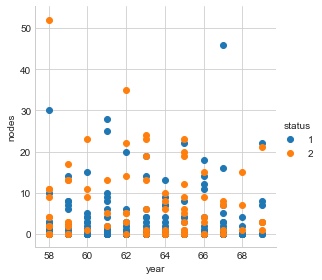

In [11]:
#Create a scatterplot based on status taking age on x-axis and nodes on y-axis
sns.set_style("whitegrid");
sns.FacetGrid(data,hue="status",size=4).map(plt.scatter,"year","nodes").add_legend();
plt.show()
#We can still make no valid inferences from here as the points are still not differenciable

Pair plot

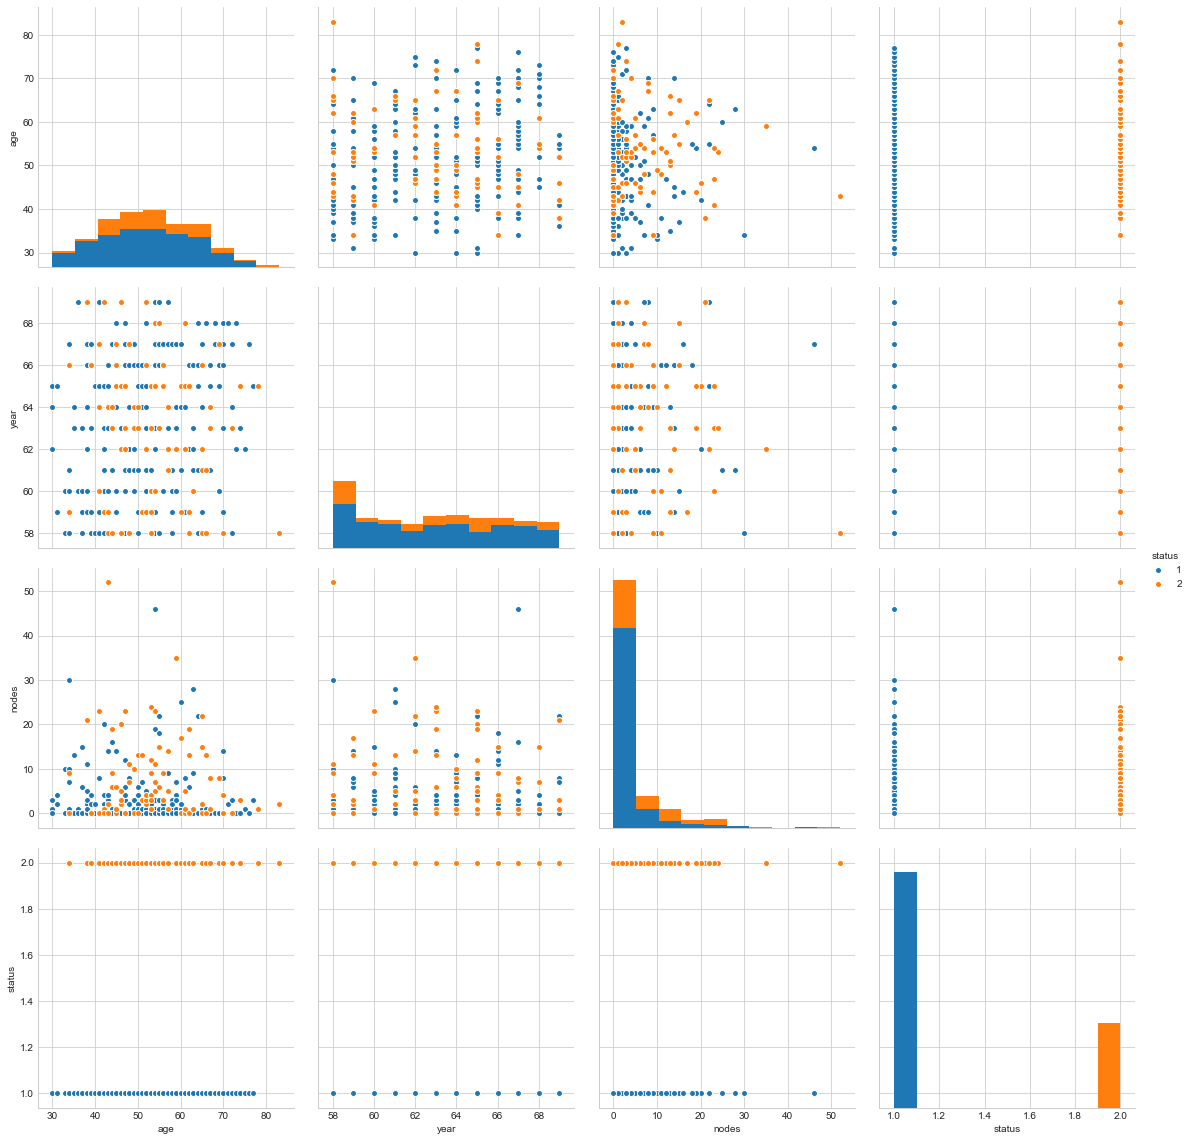

In [12]:
#Coloring by status
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="status",size=4)
plt.show()

In the above scatter diagram it is seen that the data isn't linearly seperable when coloured based on status. 
So trying to seperate based on a different column

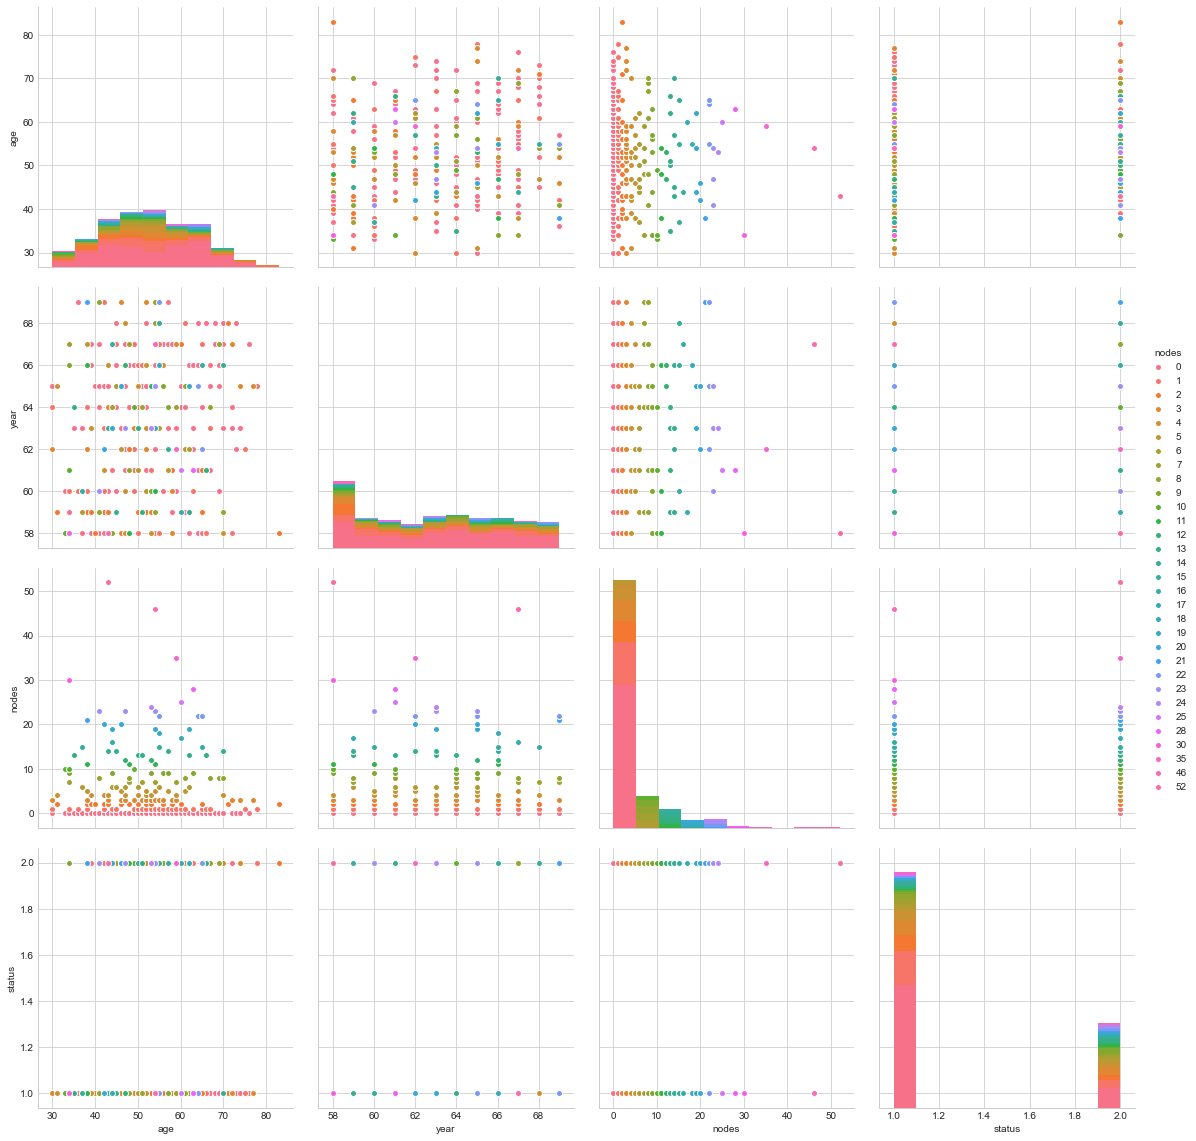

In [13]:
#Coloring by nodes
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="nodes",size=4)
plt.show()

From the above pairpot it can be seeen that combinations of age and nodes, age and year better seperate 
the data when colored by nodes. The data is linearly seperable when these two varibles are taken.

In [ ]:
From the above 

# Univariate analysis with Probability Density Function and Cumilative Distribution Functions 

# PDF

C:\Users\mghn_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mghn_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


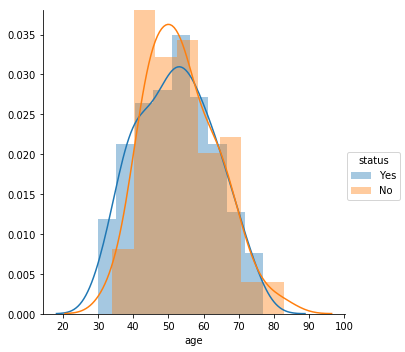

In [32]:
sns.FacetGrid(data,hue="status",size=5).map(sns.distplot,"age").add_legend()
plt.show()

C:\Users\mghn_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mghn_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


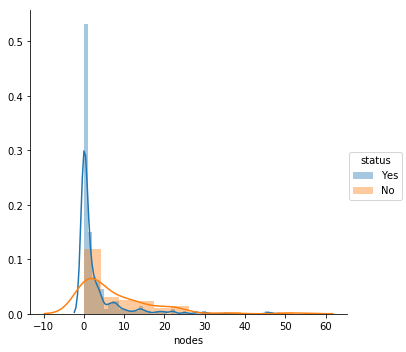

In [33]:
sns.FacetGrid(data,hue="status",size=5).map(sns.distplot,"nodes").add_legend()
plt.show()

C:\Users\mghn_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mghn_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


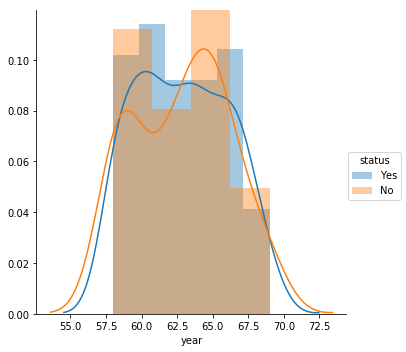

In [34]:
sns.FacetGrid(data,hue="status",size=5).map(sns.distplot,"year").add_legend()
plt.show()

In all the three graphs the variable status are not clearly seperable as there is a massive overlap. So age, nodes and year should be collectively or in pairwise be used to seggregate data.

# CDF

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


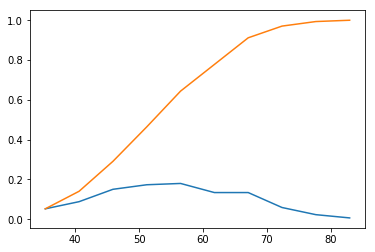

In [38]:
counts,bin_edges=np.histogram(data['age'],bins=10,density=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

#Computing CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.86928105 0.08496732 0.03594771 0.00326797 0.00653595]
[ 0.  10.4 20.8 31.2 41.6 52. ]


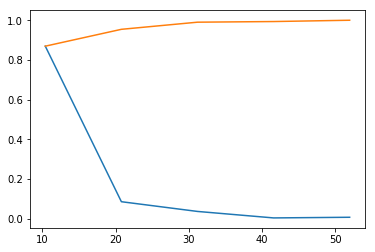

In [41]:
counts,bin_edges=np.histogram(data['nodes'],bins=5,density=5)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

#Computing CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


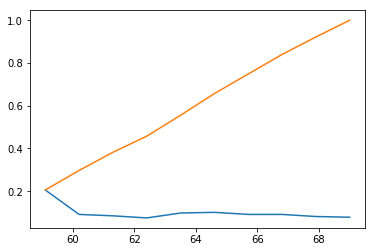

In [42]:
counts,bin_edges=np.histogram(data['year'],bins=10,density=10)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)

#Computing CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# Conclusion

a) From the above analysis it can be concluded that, around 26% of the patient died within 5 year of the treatment implying 
around 75% of the patient survived after the treatment.<br>
b) From the box-plot it can be inferred that most of the operations were done in the 63rd year of the patient.
